In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-dataset/amazon.csv


**I WANT TO KNOW BELOW INFORMATION**
1. Price
* The distribution of price regarding category
* The distribution of pirce regarding rating
2. Category
* Which category has the most and the least expensive price and the highest discount percentage
* Which category has the higest rating and rating count
3. Product
* Which words was used most to describe the product regarding category
4. Review
* The most mentioned words ragarding price
* The most mentioned words regarding category
* The most mentioned words regarding rating

# Import Data

In [2]:
amazon = pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")
amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# EDA

In [3]:
amazon.describe(include="all")

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [4]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
amazon.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

**Brief analysis of the columns and values**
* All vlaues have data type of object
* Some of columns have values of text
* Most of columns have few of unique values
* Need to delete some columns which look like unneccesary

# Cleaning and Preparing DataSet for Analysis

### Drop the columns unneccesary

In [6]:
amazon = amazon.drop(['product_id','user_id','user_name','review_id','img_link','product_link'], axis=1)
amazon.columns

Index(['product_name', 'category', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'about_product',
       'review_title', 'review_content'],
      dtype='object')

### Price-wise

#### Change the price from INR to USD

**For 'discounted_price', 'actual_price'**
1. Remove the ₹(Rupee symbol)
2. Remove the ,(comma)
3. Change the dypte from object to float
4. Change the currency from INR to USD
5. (With the same method, let's change the 'discount_percentage' values as well)

In [7]:
# Remove the ₹(Rupee symbol), ,(comma)
amazon['discounted_price'] = amazon['discounted_price'].str.replace('₹','').str.replace(',','')
amazon['actual_price'] = amazon['actual_price'].str.replace('₹','').str.replace(',','')

amazon[['discounted_price', 'actual_price']]

,discounted_price,actual_price
0,399,1099
1,199,349
2,199,1899
3,329,699
4,154,399
...,...,...
1460,379,919
1461,2280,3045
1462,2219,3080
1463,1399,1890


In [8]:
#Change the data type to float
amazon['discounted_price']=amazon['discounted_price'].astype(float)
amazon['actual_price']=amazon['actual_price'].astype(float)

amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1465 non-null   object 
 1   category             1465 non-null   object 
 2   discounted_price     1465 non-null   float64
 3   actual_price         1465 non-null   float64
 4   discount_percentage  1465 non-null   object 
 5   rating               1465 non-null   object 
 6   rating_count         1463 non-null   object 
 7   about_product        1465 non-null   object 
 8   review_title         1465 non-null   object 
 9   review_content       1465 non-null   object 
dtypes: float64(2), object(8)
memory usage: 114.6+ KB


In [9]:
#Change the currency to USD
# ₹1 = $0.01
USD = 0.01
amazon['discounted_price'] = amazon['discounted_price'].multiply(USD)
amazon['actual_price']=amazon['actual_price'].multiply(USD)

amazon[['discounted_price', 'actual_price']]

,discounted_price,actual_price
0,3.99,10.99
1,1.99,3.49
2,1.99,18.99
3,3.29,6.99
4,1.54,3.99
...,...,...
1460,3.79,9.19
1461,22.80,30.45
1462,22.19,30.80
1463,13.99,18.90


In [10]:
#'discount_precentage' columns
amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%','')
amazon['discount_percentage'] = amazon['discount_percentage'].astype(float)

amazon['discount_percentage']

0       64.0
1       43.0
2       90.0
3       53.0
4       61.0
        ... 
1460    59.0
1461    25.0
1462    28.0
1463    26.0
1464    22.0
Name: discount_percentage, Length: 1465, dtype: float64

#### Rating Data Type

**Let's change the data type of columns related to ratings too**

In [11]:
#amazon['rating']=amazon['rating'].str.replace('|','')
#amazon['rating']=amazon['rating'].astype(float)
#error: could not convert string to float: ''
amazon['rating'] = amazon['rating'].replace('|', np.nan)
amazon['rating'] = amazon['rating'].astype(float)

amazon['rating_count'] = amazon['rating_count'].str.replace(',', '')
amazon['rating_count'] = amazon['rating_count'].astype(float)

#What is the difference between replace and str replace?
#The difference is that . replace looks at the entire cell, while . str. replace looks for matches inside of the cell.

In [12]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1465 non-null   object 
 1   category             1465 non-null   object 
 2   discounted_price     1465 non-null   float64
 3   actual_price         1465 non-null   float64
 4   discount_percentage  1465 non-null   float64
 5   rating               1464 non-null   float64
 6   rating_count         1463 non-null   float64
 7   about_product        1465 non-null   object 
 8   review_title         1465 non-null   object 
 9   review_content       1465 non-null   object 
dtypes: float64(5), object(5)
memory usage: 114.6+ KB


**The values of rating needs to round off unless it has too many different values**

In [13]:
amazon['rating'] = amazon['rating'].round(0)
amazon['rating'].unique()

array([ 4.,  3.,  5.,  2., nan])

In [14]:
# let's fill the nan values with 0
amazon['rating'].fillna(0, inplace=True)
amazon['rating'].unique()

/tmp/ipykernel_18/1427182580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['rating'].fillna(0, inplace=True)


array([4., 3., 5., 2., 0.])

#### Divide Category

Divide Category into 'main_Category' and 'detail_Category', following the first one is the main and the last one is the detail. I'm gonna ignore the others.

In [15]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1465 non-null   object 
 1   category             1465 non-null   object 
 2   discounted_price     1465 non-null   float64
 3   actual_price         1465 non-null   float64
 4   discount_percentage  1465 non-null   float64
 5   rating               1465 non-null   float64
 6   rating_count         1463 non-null   float64
 7   about_product        1465 non-null   object 
 8   review_title         1465 non-null   object 
 9   review_content       1465 non-null   object 
dtypes: float64(5), object(5)
memory usage: 114.6+ KB


In [16]:
Main = amazon['category'].str.split('|').str.get(0)
Detail = amazon['category'].str.split('|').str.get(-1)

amazon['main_category'], amazon['detail_category'] = (Main, Detail)
amazon.drop(['category'], axis=1, inplace=True)
amazon.head()


,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,main_category,detail_category
0,Wayona Nylon Braided USB to Lightning Fast Cha...,3.99,10.99,64.0,4.0,24269.0,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,USBCables
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,1.99,3.49,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,USBCables
2,Sounce Fast Phone Charging Cable & Data Sync U...,1.99,18.99,90.0,4.0,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,USBCables
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,3.29,6.99,53.0,4.0,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,USBCables
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,1.54,3.99,61.0,4.0,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,USBCables


In [17]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1465 non-null   object 
 1   discounted_price     1465 non-null   float64
 2   actual_price         1465 non-null   float64
 3   discount_percentage  1465 non-null   float64
 4   rating               1465 non-null   float64
 5   rating_count         1463 non-null   float64
 6   about_product        1465 non-null   object 
 7   review_title         1465 non-null   object 
 8   review_content       1465 non-null   object 
 9   main_category        1465 non-null   object 
 10  detail_category      1465 non-null   object 
dtypes: float64(5), object(6)
memory usage: 126.0+ KB


Now we've finished cleaning and preparing data for further analysis with visualization!

### Review-wise

In [18]:
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
#from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
#from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
#from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
#from nltk import ngrams
# We can use counter to count the objects
#from collections import Counter

In [19]:
#for text by product description
text_prod = amazon[['main_category', 'about_product']]

#text = amazon[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'about_product', 'review_title', 'review_content', 'main_category']]
#for text by category
text_cate = amazon[['main_category', 'review_title', 'review_content']]
#for text by rate
text_rate = amazon[['rating', 'review_title', 'review_content']]

In [20]:
text_prod["about_product"] = text_prod["about_product"].str.lower()
text_cate["review_title"] = text_cate["review_title"].str.lower()
text_cate["review_content"] = text_cate["review_content"].str.lower()
text_rate["review_title"] = text_rate["review_title"].str.lower()
text_rate["review_content"] = text_rate["review_content"].str.lower()

/tmp/ipykernel_18/578902971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_prod["about_product"] = text_prod["about_product"].str.lower()
/tmp/ipykernel_18/578902971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cate["review_title"] = text_cate["review_title"].str.lower()
/tmp/ipykernel_18/578902971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [21]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [22]:
text_prod['about_product'] = text_prod['about_product'].apply(remove_punctuations)
text_cate["review_title"] = text_cate["review_title"].apply(remove_punctuations)
text_cate["review_content"] = text_cate["review_content"].apply(remove_punctuations)
text_rate["review_title"] = text_rate["review_title"].apply(remove_punctuations)
text_rate["review_content"] = text_rate["review_content"].apply(remove_punctuations)

/tmp/ipykernel_18/1944245735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_prod['about_product'] = text_prod['about_product'].apply(remove_punctuations)
/tmp/ipykernel_18/1944245735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cate["review_title"] = text_cate["review_title"].apply(remove_punctuations)
/tmp/ipykernel_18/1944245735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [23]:
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    fresh_text = []
    for i in text.lower().split():
        if i not in stop_words:
            fresh_text.append(i)
    return(' '.join(fresh_text))


In [24]:
text_prod['about_product'] = text_prod['about_product'].apply(remove_stopwords)
text_cate["review_title"] = text_cate["review_title"].apply(remove_stopwords)
text_cate["review_content"] = text_cate["review_content"].apply(remove_stopwords)
text_rate["review_title"] = text_rate["review_title"].apply(remove_stopwords)
text_rate["review_content"] = text_rate["review_content"].apply(remove_stopwords)

/tmp/ipykernel_18/418102407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_prod['about_product'] = text_prod['about_product'].apply(remove_stopwords)
/tmp/ipykernel_18/418102407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cate["review_title"] = text_cate["review_title"].apply(remove_stopwords)
/tmp/ipykernel_18/418102407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

It seems like we've done to clean and prepare data! Let's move on to visualizations and do more preprocessing data for each viz.

# Visualization

First of all, let's look at the category.\
It'll be helpful to understand easily on each visualization!

<Axes: title={'center': 'Count Main Category'}, xlabel='main_category'>

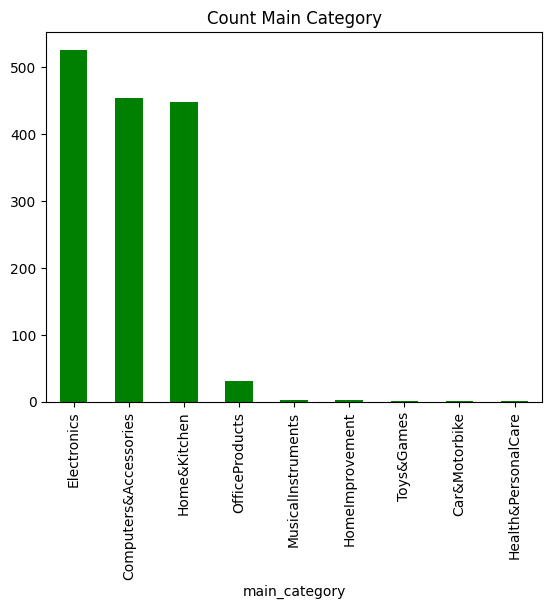

In [25]:
#Let's make the smiple bar graph to know how many are ther on each main cateogories
amazon.main_category.value_counts().plot(kind='bar', title="Count Main Category", color='green')

It'd be better to focus on **'Electronics', 'Computers&Accessories'**, and **'Home&Kitchen'** more than others, regarding the bar chart above.

I'm just wondering how many detail categories are distributed into each main category. Let' glance over it:

In [26]:
#dataframe for just categories
category_df = amazon[['main_category', 'detail_category']]
category_df

,main_category,detail_category
0,Computers&Accessories,USBCables
1,Computers&Accessories,USBCables
2,Computers&Accessories,USBCables
3,Computers&Accessories,USBCables
4,Computers&Accessories,USBCables
...,...,...
1460,Home&Kitchen,WaterPurifierAccessories
1461,Home&Kitchen,Rice&PastaCookers
1462,Home&Kitchen,HeatConvectors
1463,Home&Kitchen,ExhaustFans


In [27]:
#how many detail category has value respectively?
amazon['detail_category'].value_counts()

detail_category
USBCables             233
SmartWatches           76
Smartphones            68
SmartTelevisions       63
In-Ear                 52
                     ... 
InternalHardDrives      1
WoodenPencils           1
BatteryChargers         1
DataCards&Dongles       1
HandheldBags            1
Name: count, Length: 207, dtype: int64

In [28]:
#How many detail categories are distributed in each main category?
category_df.groupby(['main_category'])['detail_category'].count()

main_category
Car&Motorbike              1
Computers&Accessories    453
Electronics              526
Health&PersonalCare        1
Home&Kitchen             448
HomeImprovement            2
MusicalInstruments         2
OfficeProducts            31
Toys&Games                 1
Name: detail_category, dtype: int64

In [29]:
#for making chart, let's use crosstab method
category_c = pd.crosstab(index=category_df['main_category'], columns=category_df['detail_category'])
category_c

#pd.crosstab(index=category_df['main_category'], columns=category_df['detail_category']).plot.bar(stacked=True)

detail_category,3DGlasses,AVReceivers&Amplifiers,Adapters,Adapters&Multi-Outlets,AirFryers,AirPurifiers&Ionizers,AutomobileChargers,BackgroundSupports,Basic,BasicCases,...,WaterCartridges,WaterFilters&Purifiers,WaterPurifierAccessories,Webcams,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers
main_category,,,,,,,,,,,,,,,,,,,,,
Car&Motorbike,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computers&Accessories,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,18,0,0
Electronics,1,1,3,0,0,0,5,1,0,4,...,0,0,0,0,0,0,0,0,0,0
Health&PersonalCare,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Home&Kitchen,0,0,0,0,5,0,0,0,0,0,...,3,12,11,0,6,2,0,0,1,1
HomeImprovement,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MusicalInstruments,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OfficeProducts,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,4,0,0,0
Toys&Games,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


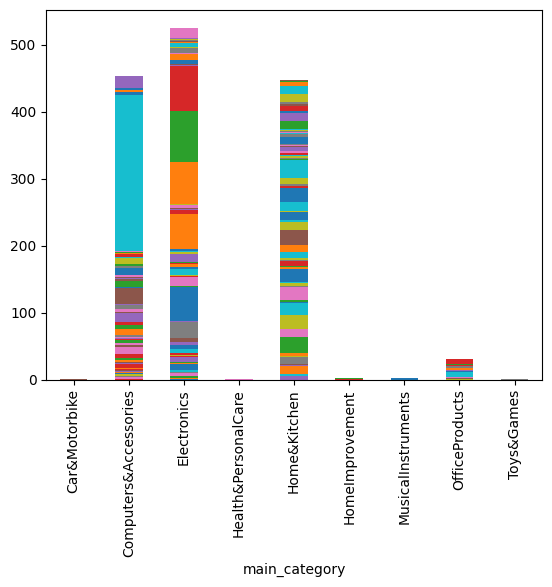

In [30]:
#Visualize stacked bar chart
import matplotlib.pyplot as plt

category_c.plot.bar(stacked=True)
plt.legend('', frameon=False)

It would be better to ignore the detail categories as Lots of detail categories are distributed in each main category.

**FROM NOW ON, AS I MENTIONED IN THE FIRST PART, I'M GONNA MAKE VISUALIZATION AND LOOK THROUGH IT TO GET THE INSIGTH**

## Price
* The distribution of price regarding category
* The distribution of pirce regarding rating

In [31]:
#let's see the general inforamtion.
amazon[['actual_price', 'discounted_price','discount_percentage']].describe()

,actual_price,discounted_price,discount_percentage
count,1465.000000,1465.000000,1465.000000
mean,54.449906,31.253109,47.691468
std,108.748269,69.443044,21.635905
min,0.390000,0.390000,0.000000
25%,8.000000,3.250000,32.000000
50%,16.500000,7.990000,50.000000
75%,42.950000,19.990000,63.000000
max,1399.000000,779.900000,94.000000


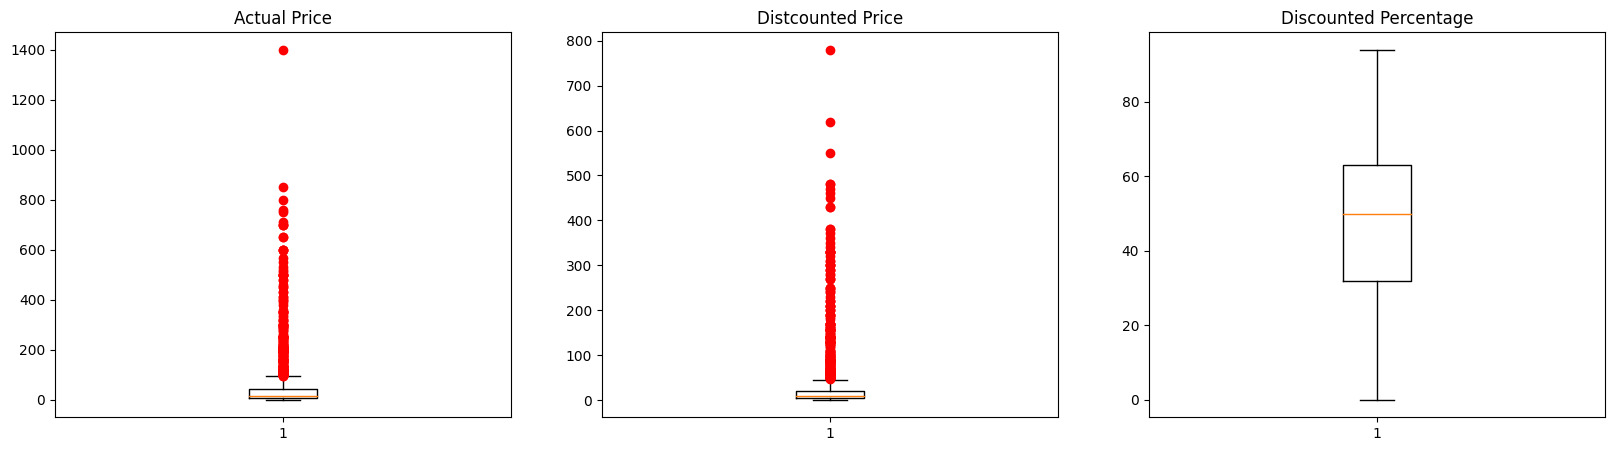

In [32]:
#Let's look at the price as box plot
fig, ax = plt.subplots(1,3, figsize=(20, 5))

ax[0].boxplot(amazon.actual_price, 0, 'ro')
ax[1].boxplot(amazon.discounted_price, 0, 'ro')
ax[2].boxplot(amazon.discount_percentage, 0, 'ro')

ax[0].set_title('Actual Price')
ax[1].set_title('Distcounted Price')
ax[2].set_title('Discounted Percentage')

plt.show()


We can find lots of outliers at 'Actual Price' and 'Discounted Price' due to various type of category.\
It means this data has big difference in level of price depending on categories

#### 1. The distribution of price regarding category

In [33]:
m_category = amazon['main_category'].unique()
m_category

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

We have total 9 main categories

In [34]:
#Let's see what's the price like in each main category
Main_Category_price = amazon[['main_category','actual_price','discounted_price']]
Main_Category_price = Main_Category_price.groupby('main_category').aggregate([min,np.mean, max])
Main_Category_price


/tmp/ipykernel_18/2558766395.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  Main_Category_price = Main_Category_price.groupby('main_category').aggregate([min,np.mean, max])
/tmp/ipykernel_18/2558766395.py:3: FutureWarning: The provided callable <function mean at 0x7d2c643d7d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  Main_Category_price = Main_Category_price.groupby('main_category').aggregate([min,np.mean, max])
/tmp/ipykernel_18/2558766395.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" i

actual_price                      discounted_price  \
                               min        mean      max              min   
main_category                                                              
Car&Motorbike                40.00   40.000000    40.00            23.39   
Computers&Accessories         0.39   16.836231   598.90             0.39   
Electronics                   1.71  101.273118  1399.00             0.79   
Health&PersonalCare          19.00   19.000000    19.00             8.99   
Home&Kitchen                  0.79   41.620737   759.90             0.79   
HomeImprovement               5.99    7.990000     9.99             2.49   
MusicalInstruments            6.99   13.470000    19.95             4.78   
OfficeProducts                0.50    3.971935    29.99             0.50   
Toys&Games                    1.50    1.500000     1.50             1.50   

                                          
                            mean     max  
main_category                             
Car&Motorbike          23.390000   23.39  
Computers&Accessories   8.426504  372.47  
Electronics            59.658878  779.90  
Health&PersonalCare     8.990000    8.99  
Home&Kitchen           23.306156  429.90  
HomeImprovement         3.370000    4.25  
MusicalInstruments      6.380000    7.98  
OfficeProducts          3.015806   13.99  
Toys&Games              1.500000    1.50

It looks like Electronics products have biggest gap in price.\
Otherwise, Car&Motorbike, Health&PersonalCare, and Toys&Games have no difference in price.

/tmp/ipykernel_18/1422676193.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  bar = sns.catplot(Main_Category_price.stack([0, 1])


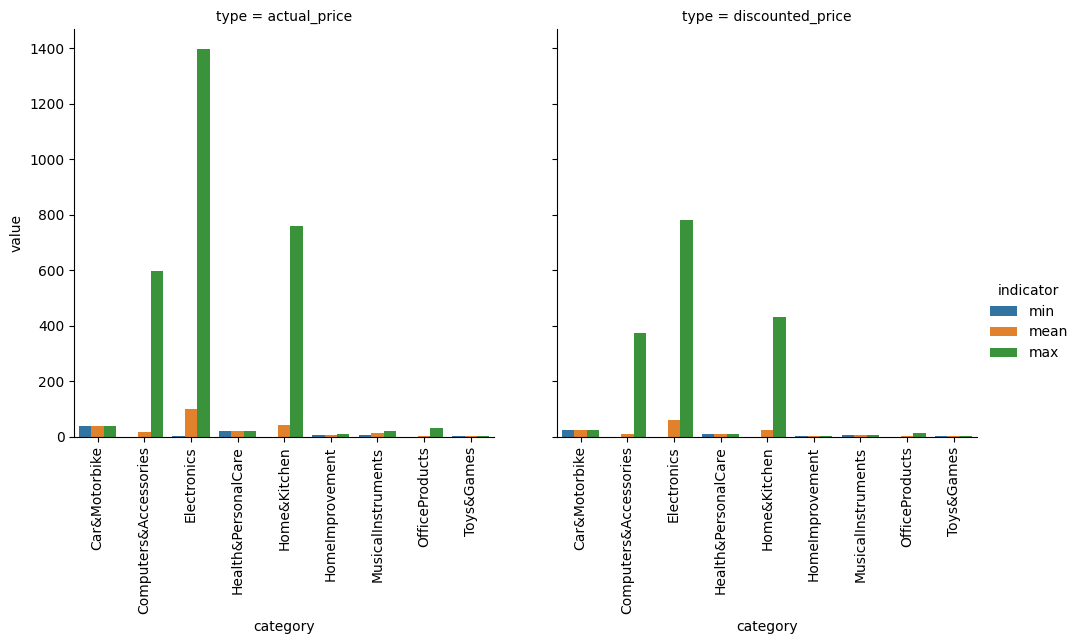

In [35]:
#Let's look at this info as bar chart
import seaborn as sns

bar = sns.catplot(Main_Category_price.stack([0, 1])
              .rename_axis(['category', 'type', 'indicator'])
              .reset_index(name='value'),
            x='category', y='value', col='type', hue='indicator',
            kind='bar')

bar.set_xticklabels(rotation=90) 

We can see there's a big differnece in max price depending on the main category, while the minimum and mean price are unremarkable.

/tmp/ipykernel_18/2345914155.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  Main_Category_dis = Main_Category_dis.groupby('main_category').aggregate([min,np.mean, max])
/tmp/ipykernel_18/2345914155.py:3: FutureWarning: The provided callable <function mean at 0x7d2c643d7d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  Main_Category_dis = Main_Category_dis.groupby('main_category').aggregate([min,np.mean, max])
/tmp/ipykernel_18/2345914155.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.


<Axes: xlabel='main_category'>

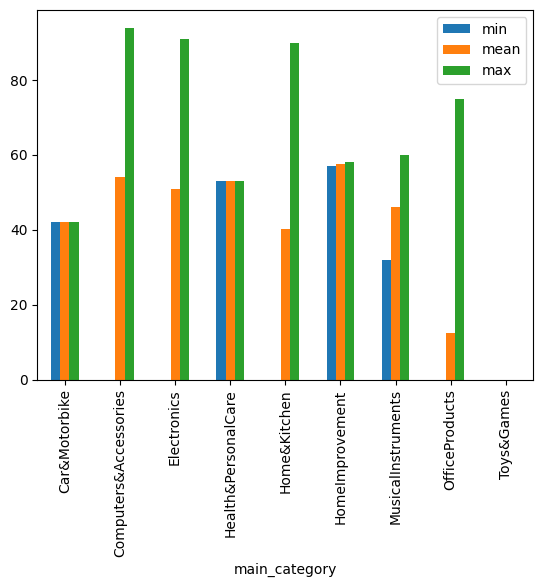

In [36]:
#What about the discount percentage?
Main_Category_dis = amazon[['main_category','discount_percentage']]
Main_Category_dis = Main_Category_dis.groupby('main_category').aggregate([min,np.mean, max])


Main_Category_dis.plot(kind='bar', y='discount_percentage', stacked=False)


In [37]:
# Then what's the products which are max and min in price


price_info = amazon.loc[
    [amazon['actual_price'].idxmax(), amazon['actual_price'].idxmin(), amazon['discounted_price'].idxmax(), amazon['discounted_price'].idxmin()]
]
price_info


,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,main_category,detail_category
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,779.90,1399.00,44.0,5.0,5935.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,Product installation was excellent but delive...,The delivery people were not careful with the ...,Electronics,SmartTelevisions
975,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.39,0.39,0.0,4.0,3344.0,The side the LED light falls on will depend on...,"Lighting,TINY & USEFUL.,Fair product,Worth for...","Recieved a wrong color.. But ok..,Simple and Q...",Computers&Accessories,Lamps
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,779.90,1399.00,44.0,5.0,5935.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,Product installation was excellent but delive...,The delivery people were not careful with the ...,Electronics,SmartTelevisions
645,GIZGA essentials Universal Silicone Keyboard P...,0.39,2.99,87.0,4.0,15233.0,Universal Silicone Keyboard Protector Keyguard...,"Good,Affordable and best,Check the size !,valu...","Value for money,Grt product,Please ensure the ...",Computers&Accessories,DustCovers


#### 2. The distribution of pirce regarding rating

In [38]:
amazon['rating'].describe()

count    1465.000000
mean        3.987031
std         0.251707
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

Most rating is positive.

<Axes: title={'center': 'The number of rating'}, xlabel='rating'>

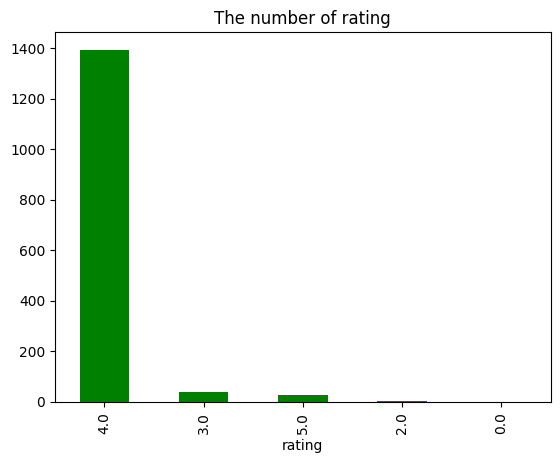

In [39]:
# how many are there in each rating?
amazon.rating.value_counts().plot(kind='bar', title='The number of rating', color='green')

4.0 is the most frequent rating, so it's obvious that most rating is positive.

In [40]:
#what about the price in each rating?
rating_price = amazon[['rating','actual_price','discounted_price']]
rating_price = rating_price.groupby('rating').aggregate([min,np.mean, max])
rating_price


/tmp/ipykernel_18/322312239.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  rating_price = rating_price.groupby('rating').aggregate([min,np.mean, max])
/tmp/ipykernel_18/322312239.py:3: FutureWarning: The provided callable <function mean at 0x7d2c643d7d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  rating_price = rating_price.groupby('rating').aggregate([min,np.mean, max])
/tmp/ipykernel_18/322312239.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  rating_price = rating_price.groupby

actual_price                     discounted_price                   
                min       mean      max              min       mean     max
rating                                                                     
0.0           24.99  24.990000    24.99            20.99  20.990000   20.99
2.0           14.99  19.970000    24.95             6.69   9.840000   12.99
3.0            3.00  23.215250   191.25             1.15   8.835750   72.99
4.0            0.39  54.501373   850.00             0.39  31.522164  619.99
5.0            2.99  98.453793  1399.00             1.60  51.080345  779.90

The rating is going higher as the average price is more expensive, except for the negative rating (0 and 2)

/tmp/ipykernel_18/2089487875.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  bar_r = sns.catplot(rating_price.stack([0, 1])


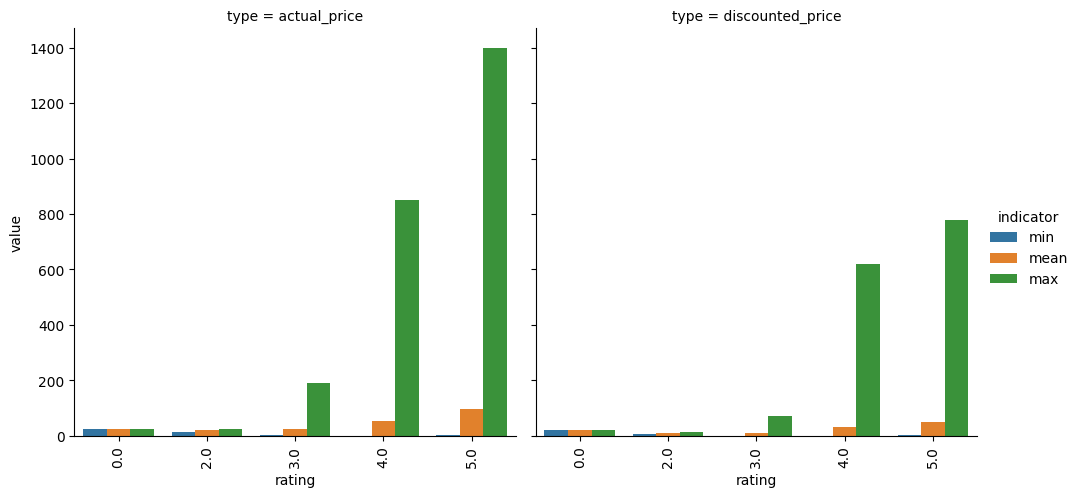

In [41]:
#Let's look this as bar chart
bar_r = sns.catplot(rating_price.stack([0, 1])
              .rename_axis(['rating', 'type', 'indicator'])
              .reset_index(name='value'),
            x='rating', y='value', col='type', hue='indicator',
            kind='bar')

bar_r.set_xticklabels(rotation=90) 

It's clear that the price and rating has positive correlation.

**Wondering the distribution of ratings in each category**

In [42]:
rating_cate = pd.crosstab(index=amazon['main_category'], columns=amazon['rating'])
rating_cate

rating,0.0,2.0,3.0,4.0,5.0
main_category,,,,,
Car&Motorbike,0,0,0,1,0
Computers&Accessories,0,0,8,437,8
Electronics,0,0,14,505,7
Health&PersonalCare,0,0,0,1,0
Home&Kitchen,1,2,18,413,14
HomeImprovement,0,0,0,2,0
MusicalInstruments,0,0,0,2,0
OfficeProducts,0,0,0,31,0
Toys&Games,0,0,0,1,0


Refering above the table, we can see:
- It's obvious that most product have positive ratings
- Only Home&Kithchen has every rating

## Product
* Which words was used most to describe the product regarding category

In [43]:
text_prod.head()

,main_category,about_product
0,Computers&Accessories,high compatibility compatible iphone 12 11 xxs...
1,Computers&Accessories,compatible type c enabled devices android smar...
2,Computers&Accessories,【 fast charger data sync】with builtin safety p...
3,Computers&Accessories,boat deuce usb 300 2 1 cable compatible smartp...
4,Computers&Accessories,charge sync function cable comes charging data...


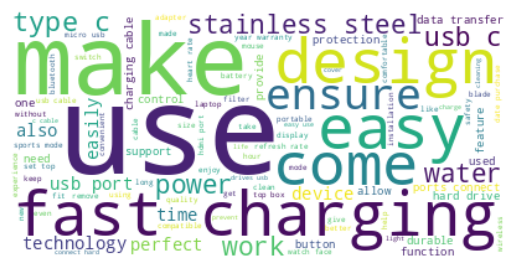

In [44]:
#Let's make word cloud
from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
description = " ".join(review for review in text_prod.about_product)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(description)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
# Which words are appeared?
prod_word = text_prod.about_product.str.split(expand=True).stack().value_counts().to_frame('frequency')
prod_word.head(20)

,frequency
usb,1006
cable,830
1,648
charging,606
warranty,495
power,494
design,464
devices,463
use,457
easy,427


Need to remove digits

In [46]:
#Let's remove the digits and see the top 10 words
text_prod.about_product.replace('\d+', '', regex=True, inplace=True)
text_prod.about_product.str.split(expand=True).stack().value_counts()

word_t10 = text_prod.about_product.str.split(expand=True).stack().value_counts().iloc[:10].to_frame('frequency')
word_t10 = word_t10.reset_index()
word_t10.rename(columns={'index': 'word'}, inplace=True)
word_t10['percentage'] = round(word_t10.frequency / prod_word.frequency.sum(),2) *100
word_t10.head()

/tmp/ipykernel_18/3979804572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_prod.about_product.replace('\d+', '', regex=True, inplace=True)


,word,frequency,percentage
0,usb,1007,1.0
1,cable,832,1.0
2,charging,608,1.0
3,warranty,500,0.0
4,power,496,0.0


Text(0.5, 1.0, 'Top 10 Words used for description of products')

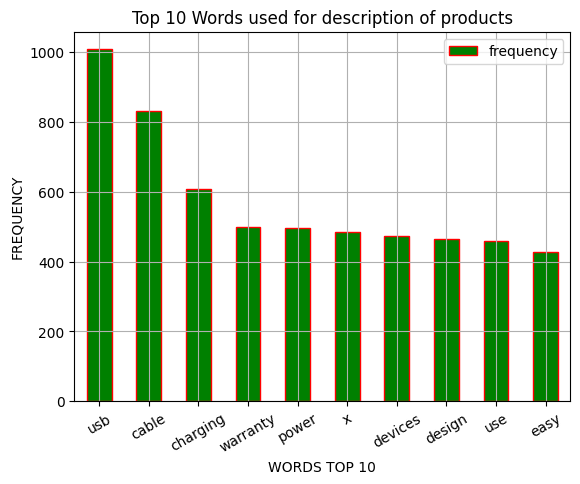

In [47]:
#Bar chart
word_t10.plot.bar(x='word',y='frequency', rot=30, xlabel="WORDS TOP 10", ylabel="FREQUENCY", color="green", edgecolor="red", grid=True)
plt.title("Top 10 Words used for description of products")

It's not surprising that USD is the most mentioned word as it's the best-selling item refering the detail category.\
Besides the words of product such as usb and cable, the sellers use the words of functions like charging and power. And then we can see some words which give the feeling of gurantee of the product like warranty. Also, the convenience of handling like easy.

## Review
* The most mentioned words ragarding price
* The most mentioned words regarding category
* The most mentioned words regarding rating

#### 1. The most mentioned words in review title and content

In [48]:
text_cate.head()

,main_category,review_title,review_content
0,Computers&Accessories,satisfiedcharging really fastvalue moneyproduc...,looks durable charging fine toono complainscha...
1,Computers&Accessories,good braided cable type c devicegood quality p...,ordered cable connect phone android auto car c...
2,Computers&Accessories,good speed earlier versionsgood productworking...,quite durable sturdyhttpsmmediaamazoncomimages...
3,Computers&Accessories,good productgood onenicereally nice productver...,good productlong wirecharges goodnicei bought ...
4,Computers&Accessories,good originaldecentgood one secondary usebest ...,bought instead original apple work 150rs fast ...


#### 전체적으로 review title 에서 많이 언급된 단어

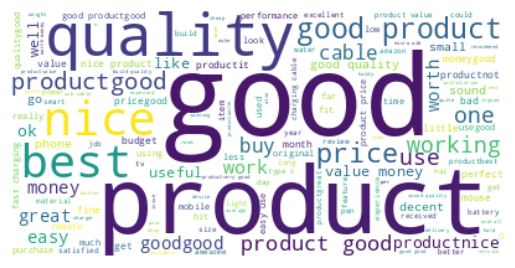

In [49]:
#Let's make wordcloud on review title

#from wordcloud import WordCloud

from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
description = " ".join(review for review in text_cate.review_title)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(description)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
#wondering how many times the words are mentioned

title_word = text_cate.review_title.str.split(expand=True).stack().value_counts().to_frame('frequency')
title_word.head(20)

,frequency
good,1136
product,957
quality,394
productgood,253
price,244
nice,206
money,190
cable,171
value,165
best,156


In [51]:
#let's extract the top20 words
title_t20 = text_cate.review_title.str.split(expand=True).stack().value_counts().iloc[:20].to_frame('frequency')
title_t20 = title_t20.reset_index()
title_t20.rename(columns={'index': 'word'}, inplace=True)
title_t20['percentage'] = round(title_t20.frequency / title_word.frequency.sum(),2) *100
title_t20.head()

,word,frequency,percentage
0,good,1136,4.0
1,product,957,4.0
2,quality,394,2.0
3,productgood,253,1.0
4,price,244,1.0


Text(0.5, 1.0, 'Top 20 Words used for review title')

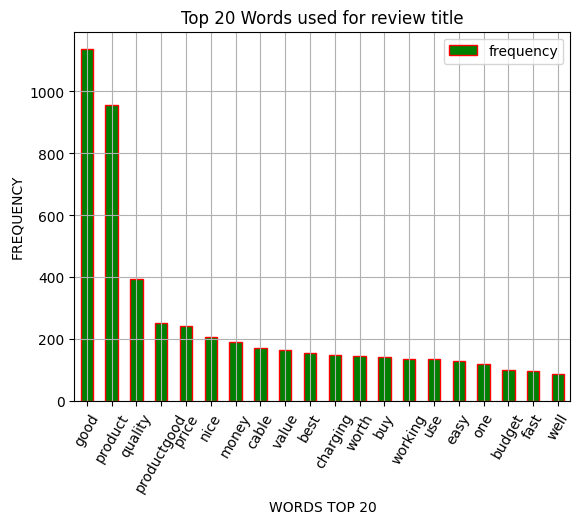

In [52]:
#Bar chart
title_t20.plot.bar(x='word',y='frequency', rot=60, xlabel="WORDS TOP 20", ylabel="FREQUENCY", color="green", edgecolor="red", grid=True)
plt.title("Top 20 Words used for review title")

#### What about review content?

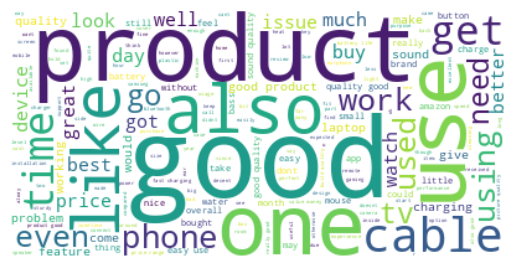

In [53]:
#Word Cloud

from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
description = " ".join(review for review in text_cate.review_content)

wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(description)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Top 20 Words in the review content')

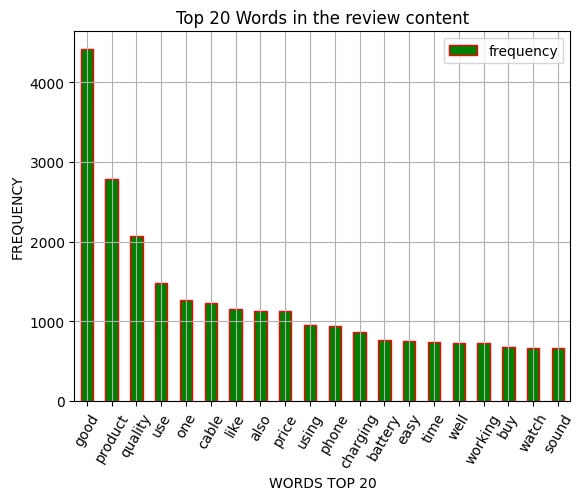

In [54]:
#Let's see the top20 words in review content in bar chart

#리뷰 탑 20
review_t20 = text_cate.review_content.str.split(expand=True).stack().value_counts().iloc[:20].to_frame('frequency')
review_t20 = review_t20.reset_index()
review_t20.rename(columns={'index': 'word'}, inplace=True)
#review_t20.head()

#막대그래프
review_t20.plot.bar(x='word',y='frequency', rot=60, xlabel="WORDS TOP 20", ylabel="FREQUENCY", color="green", edgecolor="red", grid=True)
plt.title("Top 20 Words in the review content")

#### 2. The most mentioned words regarding category

We'll see the words only in review content as it has more then title

In [55]:
#Create list

text_cate['words'] = text_cate.review_content.str.lower().str.split(' ')

 #Explode and count

cate_rv=text_cate.explode('words').groupby('main_category')['words'].value_counts()
cate_rv = cate_rv.to_frame()
cate_rv = cate_rv.reset_index()

/tmp/ipykernel_18/551097305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cate['words'] = text_cate.review_content.str.lower().str.split(' ')


In [56]:
amazon.main_category.value_counts()

main_category
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

Only three category has over remarkable review contents in quantity.\
Let's select those three for analysis

In [57]:
Electronics = cate_rv.loc[cate_rv['main_category'] == "Electronics"]
Com_Acc = cate_rv.loc[cate_rv['main_category'] == "Computers&Accessories"]
Home_Kit = cate_rv.loc[cate_rv['main_category'] == "Home&Kitchen"]

Electronics.head()

,main_category,words,count
9141,Electronics,good,2136
9142,Electronics,quality,1212
9143,Electronics,product,820
9144,Electronics,phone,791
9145,Electronics,watch,651


In [58]:
#Top 10 words in each category
Elect_t10 = Electronics.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]
Com_Acc_t10 = Com_Acc.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]
Home_Kit_t10 = Home_Kit.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]

Elect_t10

,main_category,words,count
9141,Electronics,good,2136
9142,Electronics,quality,1212
9143,Electronics,product,820
9144,Electronics,phone,791
9145,Electronics,watch,651
9146,Electronics,price,616
9147,Electronics,tv,612
9148,Electronics,battery,591
9149,Electronics,sound,553
9150,Electronics,like,551


Text(0.5, 0.98, 'Top 10 Words in Review Content')

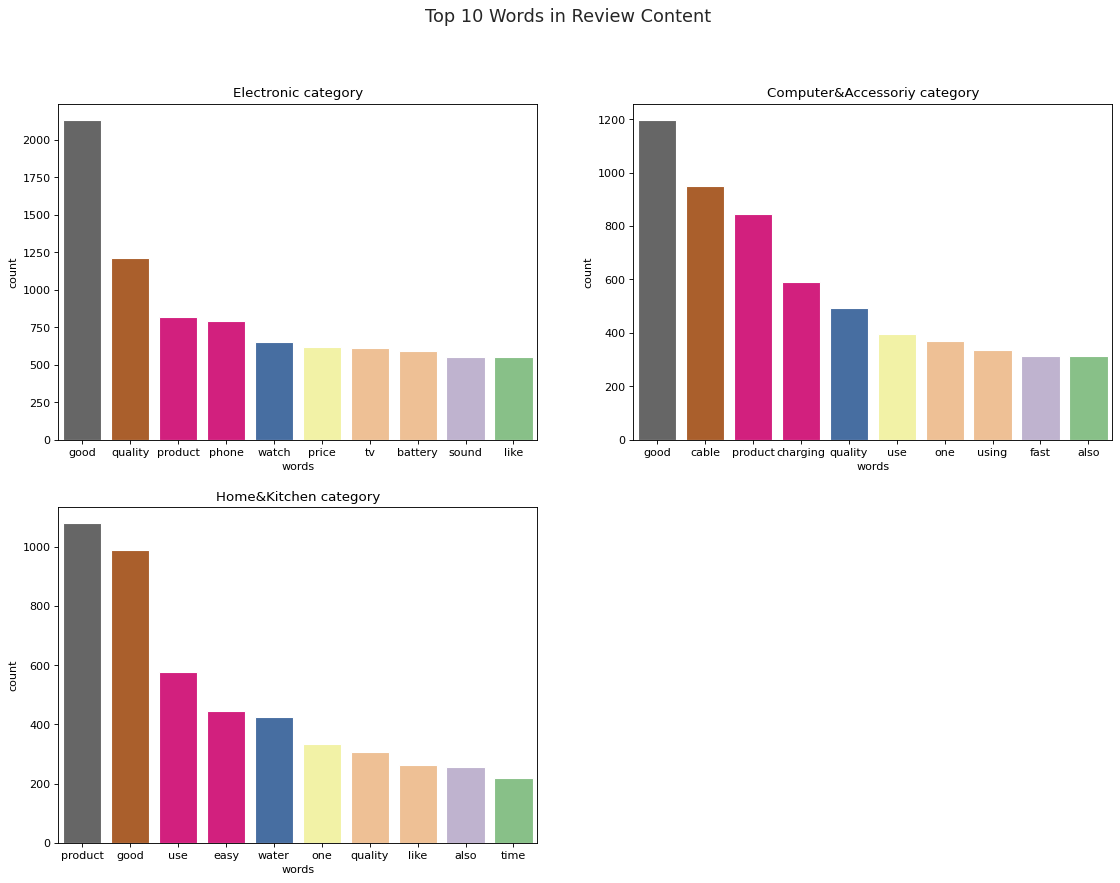

In [59]:
#Let's look at the words in bar chart

fig, axarr = plt.subplots(2, 2, figsize=(17,12), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.set_style("darkgrid")

sns.barplot(x='words', y = 'count',data = Elect_t10, ax=axarr[0][0], palette="Accent_r")
axarr[0][0].set_title('Electronic category')

sns.barplot(x='words', y = 'count',data = Com_Acc_t10, ax=axarr[0][1], palette="Accent_r")
axarr[0][1].set_title('Computer&Accessoriy category')

sns.barplot(x='words', y = 'count',data = Home_Kit_t10, ax=axarr[1][0], palette="Accent_r")
axarr[1][0].set_title('Home&Kitchen category')

fig.delaxes(axarr[1][1])

fig.suptitle('Top 10 Words in Review Content', fontsize=16)

#### 3. The most mentioned words regarding rating

In [60]:
text_rate.head()

,rating,review_title,review_content
0,4.0,satisfiedcharging really fastvalue moneyproduc...,looks durable charging fine toono complainscha...
1,4.0,good braided cable type c devicegood quality p...,ordered cable connect phone android auto car c...
2,4.0,good speed earlier versionsgood productworking...,quite durable sturdyhttpsmmediaamazoncomimages...
3,4.0,good productgood onenicereally nice productver...,good productlong wirecharges goodnicei bought ...
4,4.0,good originaldecentgood one secondary usebest ...,bought instead original apple work 150rs fast ...


In [61]:
#Create list

text_rate['words'] = text_rate.review_content.str.lower().str.split(' ')

#Explode and count

rate_rv=text_rate.explode('words').groupby('rating')['words'].value_counts()
rate_rv = rate_rv.to_frame()
rate_rv = rate_rv.reset_index()

/tmp/ipykernel_18/2970173672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_rate['words'] = text_rate.review_content.str.lower().str.split(' ')


In [62]:
# As the the score 2 of rating has only 2 reviews, I won't make the graph for it
rate_3 = rate_rv.loc[rate_rv['rating'] == 3]
rate_4 = rate_rv.loc[rate_rv['rating'] == 4]
rate_5 = rate_rv.loc[rate_rv['rating'] == 5]

rate_3.head()

,rating,words,count
204,3.0,product,64
205,3.0,good,59
206,3.0,quality,41
207,3.0,one,36
208,3.0,remote,35


In [63]:
#Top10 words in each rating
r3_t10 = rate_3.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]
r4_t10 = rate_4.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]
r5_t10 = rate_5.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]

r3_t10

,rating,words,count
204,3.0,product,64
205,3.0,good,59
206,3.0,quality,41
207,3.0,one,36
208,3.0,remote,35
209,3.0,use,29
210,3.0,working,26
211,3.0,bluetooth,24
212,3.0,price,19
213,3.0,also,17


Text(0.5, 0.98, 'Top 10 Words in Review Content')

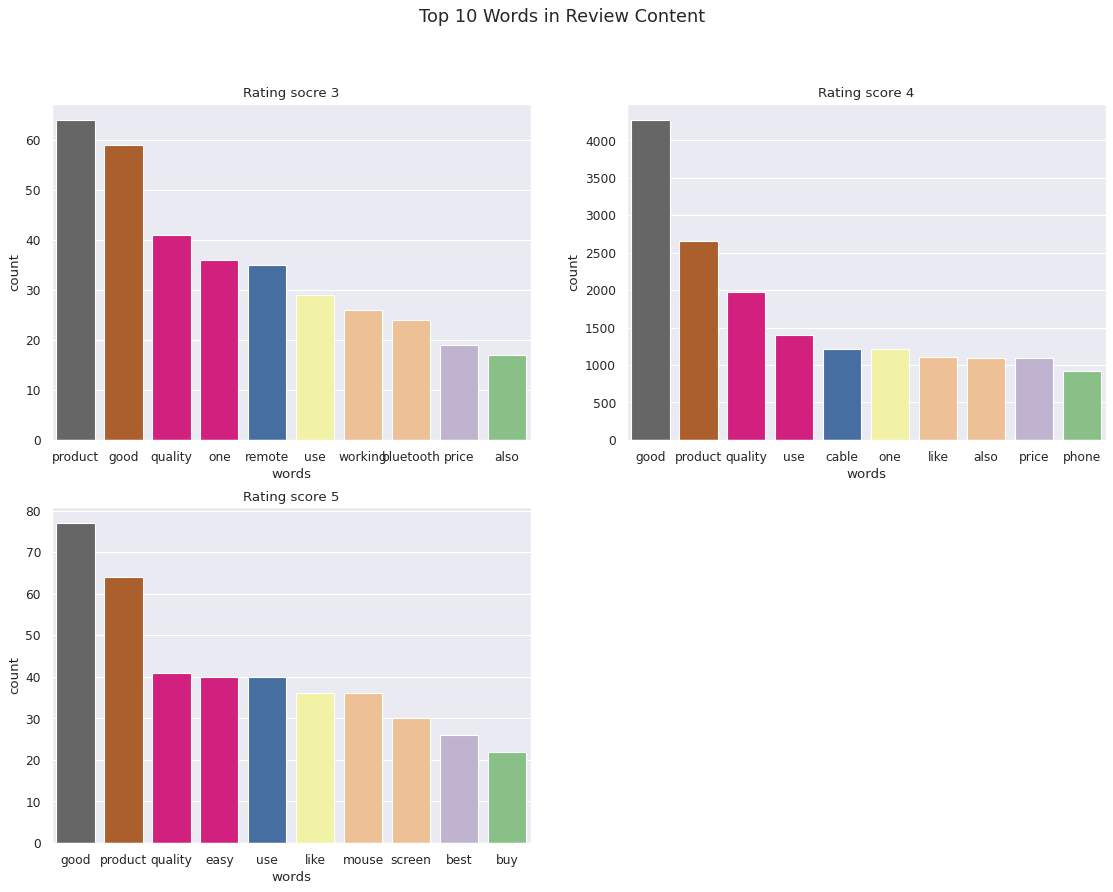

In [64]:
#Let's make bar chart
fig, axarr = plt.subplots(2, 2, figsize=(17,12), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.set_style("darkgrid")

sns.barplot(x='words', y = 'count',data = r3_t10, ax=axarr[0][0], palette="Accent_r")
axarr[0][0].set_title('Rating socre 3')

sns.barplot(x='words', y = 'count',data = r4_t10, ax=axarr[0][1], palette="Accent_r")
axarr[0][1].set_title('Rating score 4')

sns.barplot(x='words', y = 'count',data = r5_t10, ax=axarr[1][0], palette="Accent_r")
axarr[1][0].set_title('Rating score 5')

fig.delaxes(axarr[1][1])

fig.suptitle('Top 10 Words in Review Content', fontsize=16)